In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 30,5
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import import_ipynb
from nbeats_keras.model import NBeatsNet
from statsmodels.tsa.stattools import adfuller

Using TensorFlow backend.


In [2]:
import LevelsCreater as lc

importing Jupyter notebook from LevelsCreater.ipynb


In [3]:
a='Data'
b='sales_train_validation.csv'
sale=pd.read_csv(os.path.join(a,b))

In [4]:
levels = lc.LevelsCreater()
level5 = levels.level_5(sale)


In [60]:
ts1 = level5.iloc[0,:]
ts1_log = np.log(ts1)

ts1_exp = ts1.ewm(halflife = 7,ignore_na = False, min_periods = 0,adjust = True).mean()

ts1_log.iloc[np.where(ts1_log == np.min(ts1_log))]=0


In [24]:
def test_stationarity(ts,window):
    rolling_mean = ts.rolling(window = window,center=False).mean()
    
    rolling_std = ts.rolling(window = window,center=False).std()
    
    
    
    orignal = plt.plot(ts, color = 'blue', label = 'Original')
    mean = plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolling_std,color = 'black', label = 'Rolling Std')
    plt.legend()
    plt.show()
    plt.close()
    
    dftest = adfuller(ts)
    test_output= pd.DataFrame(dftest[0:4],index = ['Test Statistic','p-value','# Lags Used','Number of Observations Used'],columns=['Value'])

    for key,value in dftest[4].items():
        test_output = pd.concat([test_output,pd.DataFrame([value],index=[f'Critical Value at {key}'],columns=['Value'])])
    print(test_output)
    

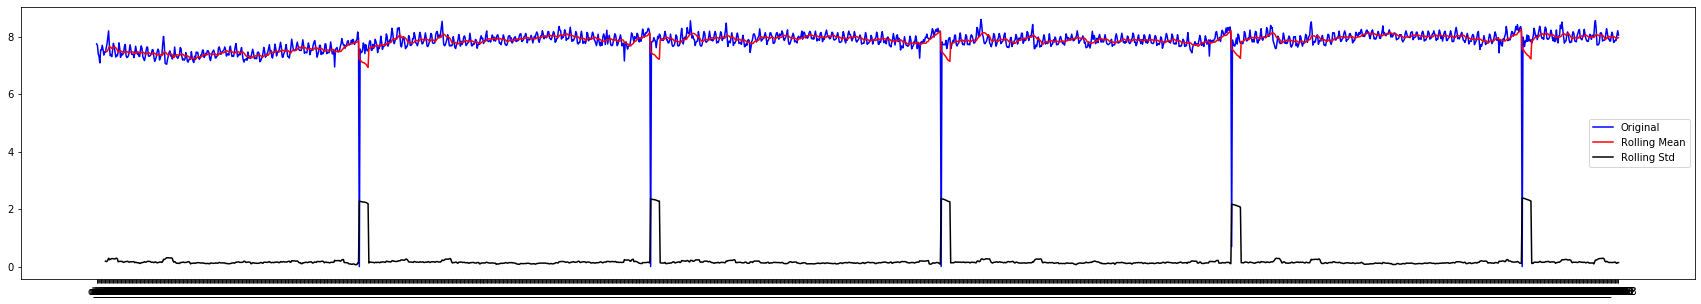

                                   Value
Test Statistic                 -3.700180
p-value                         0.004111
# Lags Used                    26.000000
Number of Observations Used  1886.000000
Critical Value at 1%           -3.433822
Critical Value at 5%           -2.863074
Critical Value at 10%          -2.567586


In [61]:
test_stationarity(ts1_log,12)